In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.tokenize.casual import casual_tokenize

import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/breezehomefolder/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/breezehomefolder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('Data/reddit_corpus', index_col = 0)

In [3]:
df.fillna("", inplace = True)

In [4]:
list_1 = ['ring', 'chosen one', 'gandalf','Gandalf', 'Gandalf the Grey', 'albus', 'albus dumbledore', 'Albus Dumbledore',
 'Sauron the Deceiver', 'sauron', 'Voldemort', 'voldemort ', 'Lord Voldemort', 'the dark lord','The Dark Lord', 'horcrux', 'horcruxes', 
 'Horcrux', 'Horcruxes', 'Nazgul', 'nazgul', 'Dementors', 'dementors', 'gollum', 'Gollum', 'The Elves Shelob', 'Elves',
 'Elf', 'aragog', 'Aragog', 'Mirror of Galadriael', 'Mirror of Erised-Pensieve', 'Dead Marshes', 'Inferi', 'Legilimens',
 'the power of the ring', 'Harry', 'Harry Potter', 'Dobby', 'the elf', 'Wizard', 'wizard', 'wand', 'Hermione', 'Ron']




In [5]:
df['selftext'] = df['selftext'].replace(list_1, "")

In [6]:
X = df['selftext']
y = df['subreddit']

In [7]:
y.value_counts(normalize = True)

lotr           0.5
harrypotter    0.5
Name: subreddit, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify = y)

In [9]:
vect = CountVectorizer()

In [10]:
vect.fit(X_train)
X_train = vect.transform(X_train)

In [11]:
vect.get_feature_names_out()

array(['000', '03', '10', ..., 'zombified', 'zone', 'zoom'], dtype=object)

In [12]:
vect2 = CountVectorizer()
vect2.fit(X_test)
X_test = vect2.transform(X_test)

In [13]:
pipe = Pipeline([
    ('vect2', CountVectorizer(stop_words = list_1)),
    ('model', LogisticRegression())
])

In [14]:
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=vect.get_feature_names_out())

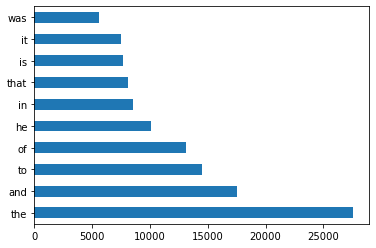

In [15]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');


In [18]:
# define model
model = LogisticRegression()
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.w

/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.w

Best Score: 0.9650000000000001
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---------------------------------------------------------------------------

In [16]:
#How will my model perform on unseen data?
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['chosen', 'dark', 'dead', 'deceiver', 'dobby', 'dumbledore', 'elf', 'elves', 'erised', 'galadriael', 'grey', 'harry', 'hermione', 'inferi', 'legilimens', 'lord', 'marshes', 'mirror', 'of', 'one', 'pensieve', 'potter', 'power', 'ron', 'shelob', 'the', 'voldemort'] not in stop_words.
  warnings.warn(
/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['chosen', 'dark', 'dead', 'deceiver', 'dobby', 'dumbledore', 'elf', 'elves', 'erised', 'galadriael', 'grey', 'harry', 'hermione', 'inferi', 'legilimens', 'lord', 'marshes', 'mirror', 'of', 'one', 'pensieve', 'potter', 'power', 'ron', 'shelob', 'the', '

nan

In [ ]:
#From lecture on 2.25
param_grid = {
    'vect__binary': [True, False],
    'vect__max_features': [None, 4000, 5000],
    'vect__stop_words': ['english', None],
}
gs = GridSearchCV(pipe, param_grid=param_grid)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_